# **Uploading and reading CSV files on Google colab**

In [ ]:
#uploading files into google colab
from google.colab import files
uploaded = files.upload()

Saving fake_reg.csv to fake_reg.csv


In [ ]:
#reading data
import pandas as pd
df = pd.read_csv('fake_reg.csv')
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


# **Visualizing the data using Pairplot**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

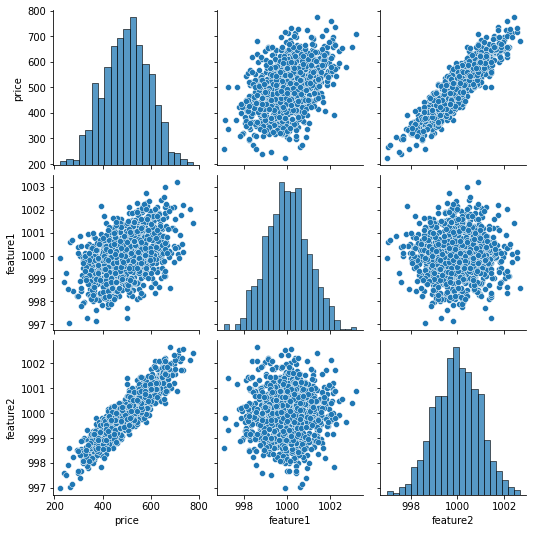

In [ ]:
sns.pairplot(df)

# **Data Preprocessing**

In [ ]:
from sklearn.model_selection import train_test_split
# Convert Pandas to Numpy for Keras

# Features
X = df[['feature1','feature2']].values

# Label
y = df['price'].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
X_train.shape

(700, 2)

In [ ]:
X_test.shape

(300, 2)

In [ ]:
y_train.shape

(700,)

In [ ]:
y_test.shape

(300,)

In [ ]:
#scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# **Building a simple Artificial Neural Network**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [ ]:
#building the model
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

# Final output node for prediction
model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

In [ ]:
#fitting the data to the training data
model.fit(X_train,y_train,epochs=250)

Epoch 1/250
22/22 [==============================] - 0s 1ms/step - loss: 256805.5781
Epoch 2/250
22/22 [==============================] - 0s 1ms/step - loss: 256677.0312
Epoch 3/250
22/22 [==============================] - 0s 1ms/step - loss: 256606.2344
Epoch 4/250
22/22 [==============================] - 0s 1ms/step - loss: 256548.6875
Epoch 5/250
22/22 [==============================] - 0s 1ms/step - loss: 256482.3281
Epoch 6/250
22/22 [==============================] - 0s 944us/step - loss: 256402.8281
Epoch 7/250
22/22 [==============================] - 0s 1ms/step - loss: 256309.7188
Epoch 8/250
22/22 [==============================] - 0s 1ms/step - loss: 256201.7344
Epoch 9/250
22/22 [==============================] - 0s 996us/step - loss: 256077.4375
Epoch 10/250
22/22 [==============================] - 0s 1ms/step - loss: 255933.5156
Epoch 11/250
22/22 [==============================] - 0s 953us/step - loss: 255767.5625
Epoch 12/250
22/22 [==============================] - 0s 

In [ ]:
loss = model.history.history['loss']

In [ ]:
print(loss)

[256805.578125, 256677.03125, 256606.234375, 256548.6875, 256482.328125, 256402.828125, 256309.71875, 256201.734375, 256077.4375, 255933.515625, 255767.5625, 255582.015625, 255374.671875, 255142.0625, 254884.296875, 254599.8125, 254282.125, 253933.9375, 253551.25, 253129.125, 252668.9375, 252168.09375, 251620.09375, 251026.609375, 250383.5625, 249690.109375, 248940.875, 248134.515625, 247269.734375, 246342.1875, 245351.3125, 244292.890625, 243162.234375, 241959.34375, 240680.703125, 239325.515625, 237888.984375, 236365.625, 234757.828125, 233056.546875, 231271.59375, 229385.1875, 227407.84375, 225316.984375, 223155.390625, 220874.921875, 218483.5625, 215998.171875, 213390.75, 210674.609375, 207834.703125, 204899.984375, 201826.5625, 198663.5625, 195381.25, 191993.03125, 188461.109375, 184828.78125, 181077.984375, 177221.296875, 173228.484375, 169117.546875, 164918.40625, 160586.609375, 156151.8125, 151613.59375, 146969.171875, 142251.21875, 137426.03125, 132525.796875, 127544.25, 12250

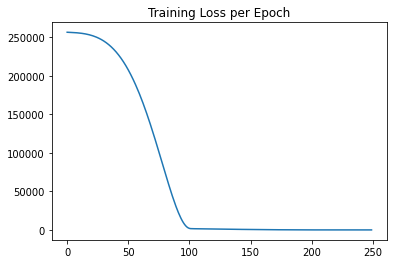

In [ ]:
#visualizing the loss
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch");

# **Model Evaluation and getting the predictions**

In [ ]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)
training_score

23.907634735107422

In [ ]:
test_predictions = model.predict(X_test)
test_predictions

array([[405.2367 ],
       [623.40814],
       [591.9949 ],
       [572.1514 ],
       [366.65067],
       [579.07477],
       [515.0314 ],
       [459.00668],
       [549.17737],
       [447.41724],
       [611.6568 ],
       [548.7687 ],
       [419.0476 ],
       [408.83267],
       [651.0243 ],
       [437.2143 ],
       [508.3018 ],
       [659.84973],
       [662.465  ],
       [565.3979 ],
       [334.23788],
       [444.77133],
       [382.50946],
       [378.70847],
       [566.4895 ],
       [610.50397],
       [532.30316],
       [427.79248],
       [655.3449 ],
       [413.99686],
       [442.54184],
       [485.04617],
       [438.34427],
       [681.72943],
       [424.6504 ],
       [417.65994],
       [501.7618 ],
       [550.36456],
       [509.69965],
       [395.3775 ],
       [618.44586],
       [416.5503 ],
       [604.3118 ],
       [445.84088],
       [501.90308],
       [581.52026],
       [668.795  ],
       [490.29117],
       [318.5243 ],
       [485.3528 ],


In [ ]:
pred_df = pd.DataFrame(y_test,columns=['Test Y'])
pred_df

,Test Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [ ]:
test_predictions = pd.Series(test_predictions.reshape(300,))
pred_df = pd.concat([pred_df,test_predictions],axis=1)
pred_df.columns = ['Test Y','Model Predictions']

In [ ]:
pred_df

,Test Y,Model Predictions
0,402.296319,405.236694
1,624.156198,623.408142
2,582.455066,591.994873
3,578.588606,572.151428
4,371.224104,366.650665
...,...,...
295,525.704657,528.980164
296,502.909473,515.358337
297,612.727910,609.516907
298,417.569725,416.863403


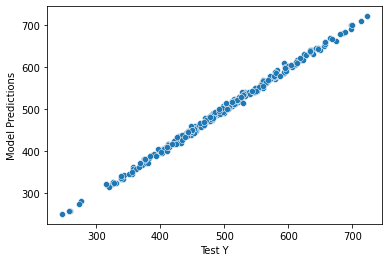

In [ ]:
sns.scatterplot(x='Test Y',y='Model Predictions',data=pred_df)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


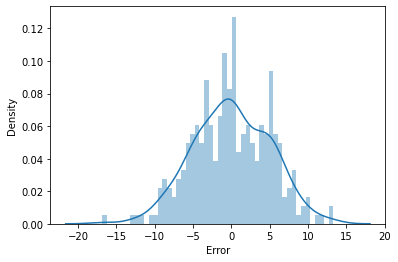

In [ ]:
pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Predictions']
sns.distplot(pred_df['Error'],bins=50)

In [ ]:
#getting the mae and mse
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(mean_absolute_error(pred_df['Test Y'],pred_df['Model Predictions']))
print(mean_squared_error(pred_df['Test Y'],pred_df['Model Predictions']))

4.001299446323058
24.950546645011663


In [ ]:
#RMSE
test_score**0.5

4.995051987447158